## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [12]:
# %pip install ipykernel --break-system-packages
# %pip install scikit-learn --break-system-packages
# %pip install matplotlib --break-system-packages
# %pip install keras --break-system-packages
# %pip install tensorflow --break-system-packages
# %pip install pandas --break-system-packages
# %pip install plotly --break-system-packages
# %pip install seaborn --break-system-packages
# %pip install nbformat --break-system-packages
# %pip install keras --break-system-packages
# %pip install pyswarm


In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.initializers import GlorotUniform    #Inicializador de pesos
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #Biblioteca para machine learning

In [ ]:

base_path = './dataset/'

# carregando arquivo CSV
time_base = 'days'  # Escolha do tipo de agrupamento
duas_unas_dataset = f'{base_path}duas_unas/{time_base}/grouped_3_{time_base}.csv'  # Definição do caminho do diretório do dataset
print(len(duas_unas_dataset))
validation_interval = 31  # Definição da parcela dos dados que serão retiradas do treinamento/teste para validação
time_step = 1  # Number of previous time steps to consider
output_steps = 30  # Number of future steps to predict

# transformando CSV em DataFrame
duas_unas_df = pd.read_csv(duas_unas_dataset)  # Transformação em dataset

duas_unas_validation = duas_unas_df.tail(validation_interval)  # Criação do dataset de validação

indices_to_validate = duas_unas_df.index[-validation_interval:].tolist()  # Obtenção dos índices dos dadoss de validação
duas_unas_df = duas_unas_df.drop(indices_to_validate).reset_index(drop=True)  # Retirada dos dados de validação do dataset original de treino/teste

duas_unas_df['timestamp'] = pd.to_datetime(duas_unas_df['timestamp'])  # Transformação dos dados da coluna 'timestamp' no formato datetime. Ela lida com vários formatos de data/hora e tenta interpretá-los de forma inteligente.
duas_unas_validation['timestamp'] = pd.to_datetime(duas_unas_validation['timestamp'])  # Idem da ação da linha de cima.

duas_unas_df['index'] = range(len(duas_unas_df))  # Criação da coluna 'index' em que os valores vão de zero ao tamanho total do daframe
duas_unas_validation['index'] = indices_to_validate  # Idem da acima da linha acima
print(indices_to_validate)
duas_unas_df['kwh'] = duas_unas_df['kWh fornecido']  # Criação da coluna 'kwh' que copia os dados da coluna 'kWh fornecido'
duas_unas_validation['kwh'] = duas_unas_validation['kWh fornecido']  # Idem da acima da linha acima

duas_unas_df.drop(columns=['timestamp'], inplace=True)  # Remoção da coluna 'timestamp', inclusive no dataframe original
duas_unas_validation.drop(columns=['timestamp'], inplace=True)  # Idem da acima da linha acima

duas_unas_df.drop(columns=['kWh fornecido'], inplace=True)  # Remoção da coluna 'kWh fornecido', inclusive no dataframe original
duas_unas_validation.drop(columns=['kWh fornecido'], inplace=True)  # Idem da acima da linha acima

X = duas_unas_df['index'].values.reshape(-1,1)  # Cria o array X com os índices do dataframe duas_unas_df
y = duas_unas_df['kwh'].values  # Cria o array y com os dados de energia de duas_unas_df
#print(y)
X_validation = duas_unas_validation['index'].values.reshape(-1,1)  # Cria o array X_validation com os índices do dataframe duas_unas_validation
y_validation = duas_unas_validation['kwh'].values  # Cria o array y com os dados de energia de duas_unas_validation
#print(X_validation)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# regr = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=200).fit(X_train, y_train)

# y_pred = regr.predict(X_test)

# from sklearn.metrics import mean_squared_error

# rms = mean_squared_error(y_test, y_pred, squared=False)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_test, y_test, color="blue", label="Valores Reais")
# plt.scatter(X_test, y_pred, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Teste do MLPRegressor (RMSE: {rms:.2f})")
# plt.xlabel("Horas (X)")
# plt.ylabel("Previsão (y)")
# plt.legend()
# plt.show()

In [16]:
# print(X_validation)
# y_pred_validation = regr.predict(X_validation)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_validation, y_validation, color="blue", label="Valores Reais")
# plt.scatter(X_validation, y_pred_validation, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [17]:
# pirapama_dataset = f'{base_path}outras_unidades/pirapama/agrupado_hora_Pirapama_2021.csv'
# # transformando CSV em DataFrame
# pirapama_df = pd.read_csv(pirapama_dataset)

# pirapama_df['Data'] = pd.to_datetime(pirapama_df['Data'])

# pirapama_df['index'] = range(len(pirapama_df))

# pirapama_df['kwh'] = pirapama_df['kWh fornecido'] 

# pirapama_df.drop(columns=['Data'], inplace=True)

# pirapama_df.drop(columns=['kWh fornecido'], inplace=True)

# X_pirapama = pirapama_df['index'].values.reshape(-1,1)
# y_pirapama = pirapama_df['kwh'].values

# y_pred = regr.predict(X_pirapama)

# plt.figure(figsize=(8, 6))
# plt.plot(X_pirapama, y_pirapama, color="blue", label="Valores Reais")
# plt.plot(X_pirapama, y_pred, color="red", label="Valores Previstos")
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [ ]:


scaler = MinMaxScaler(feature_range=(0, 1))  # Padronização dos dados
scaled_kwh = scaler.fit_transform(duas_unas_df['kwh'].values.reshape(-1, 1))  # padronização de duas_unas_df

scaled_kwh_validation = scaler.fit_transform(duas_unas_validation['kwh'].values.reshape(-1,1))  # padronização de duas_unas_validacao

def create_dataset(data, time_step, output_steps):  # Função para construção do dataset
    X, y = [], []  # Criação das listas
    for i in range(len(data) - time_step - output_steps + 1):  # Loop
        X.append(data[i:(i + time_step), 0])  # Construção do dataset 
        y.append(data[(i + time_step):(i + time_step + output_steps), 0])
    return np.array(X), np.array(y)

# Create the dataset
X, y = create_dataset(scaled_kwh, time_step, output_steps)

X_validation, y_validation = create_dataset(scaled_kwh_validation, time_step, output_steps)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(10, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(10, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(output_steps))

# learning_rate = 0.0005
# optimizer = Adam(learning_rate=learning_rate)

# model.compile(optimizer=optimizer, loss='mean_squared_error')

# #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.02, patience=2, verbose=0, mode='auto')
# history = model.fit(X_train, y_train, epochs=100000, batch_size=8, validation_split=.2, callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=2, patience=3))

# # Train the model
# #history = model.fit(X_train, y_train, epochs=1000, batch_size=4, verbose=1, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1))

# # Plotar as perdas de treinamento e validação
# plt.plot(history.history['loss'], label='Loss de Treinamento')
# plt.plot(history.history['val_loss'], label='Loss de Validação')
# plt.xlabel('Épocas')
# plt.ylabel('Perda')
# plt.legend()
# plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
import numpy as np


# Função que recebe uma lista de hiperparâmetros como entrada e treina um modelo LSTM
# com esses hiperparâmetros. Ela retorna a perda do modelo, que é usada para guiar a otimização.
def evaluate_hyperparameters(params):
    num_camadas_LSTM, learning_rate, batch_size, patience, epochs, loss, optimizer, units, dropout_rate, activation = params
    # A lista "params" contém todos os hiperparâmetros a serem otimizados
    
    # Criar o modelo
    model = Sequential()
    # Laço para adicionar o número de camadas LSTM e dropout especificado por num_camadas_LSTM
    for _ in range(int(num_camadas_LSTM)):
        model.add(LSTM(int(units), return_sequences=True if _ < int(num_camadas_LSTM) - 1 else False, input_shape=(X_train.shape[1], 1)))
        # A relação condicional define se a camada deve retornar a sequência completa ou somente 
        # o último estado. Apenas a última camada LSTM não retorna sequência, porque é a camada final
        model.add(Dropout(dropout_rate))

    model.add(Dense(output_steps, activation=activation))
    # camada de saída em que "out_steps" define o número de passos futuros que serão previstos

    # Selecionar o otimizador
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:  # 'sgd'
        opt = SGD(learning_rate=learning_rate)


    model.compile(optimizer=opt, loss=loss)
    # Compila o modelo, definindo o otimizador e a função de perda 
    # a ser utilizada durante o treinamento.

    # Treinar o modelo com EarlyStopping
    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=int(patience), restore_best_weights=True)
    # EarlyStopping: Importa o callback EarlyStopping, que para o treinamento se a perda de validação
    # (val_loss) não melhorar após "patience" épocas. O parâmetro "restore_best_weights=True" garante
    # que os pesos do melhor modelo serão restaurados.
    
    history = model.fit(X_train, y_train, batch_size=int(batch_size), epochs=int(epochs), validation_data=(X_validation, y_validation), 
                        verbose=0, callbacks=[early_stopping])
    # Modelo é treinado até que a condição do EarlyStopping seja alcançada. O "loss" e "val_loss" são salvos
    #em "history" para plot posterior.
    
    # Plotar as perdas de treinamento e validação
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.show()
    
    # Avaliar o modelo
    score = model.evaluate(X_validation, y_validation, verbose=0)
    # O modelo é avaliado. X_validation é usado para realizar previsões e compará-las com com y_validation.
    # A métrica utilizada é a mesma da compilação, ou seja, "loss".
    print(f"score: {score}")
    
    return score  # Retorna a perda a ser minimizada


In [ ]:
# Função de mapeamento dos hiperparâmetros - substitui os índices numéricos de
# "loss_options", "optimizer_options" e "activation_options" pelas respectivas strings
def mapped_evaluate(params):
    # Mapeamentos para as métricas de perda, otimizadores e ativação
    loss_options = ["mean_squared_error", "mean_absolute_error"]
    optimizer_options = ["adam", "rmsprop", "sgd"]
    activation_options = ["tanh", "relu", "sigmoid"]

    # Mapear índices para os parâmetros
    loss_idx = int(params[5])  # índice da função de perda
    optimizer_idx = int(params[6])  # índice do otimizador
    activation_idx = int(params[9])  # índice da função de ativação

    # Criar uma lista de parâmetros, substituindo os índices de perda, otimizador e ativação por suas strings correspondentes
    modified_params = [
        params[0],  # num_camadas_LSTM
        params[1],  # learning_rate
        params[2],  # batch_size
        params[3],  # patience
        params[4],  # epochs
        loss_options[loss_idx],  # função de perda
        optimizer_options[optimizer_idx],  # otimizador
        params[7],  # units
        params[8],  # dropout_rate
        activation_options[activation_idx]  # função de ativação
    ]

    return evaluate_hyperparameters(modified_params)
    # No retorno a lista de hiperparâmetros criada é avaliada através da função evaluate_hyperparameters,
    # que cria, treina e testa o modelo LSTM com os hiperparâmetros. Ao final é calculado o score do modelo.

In [ ]:
from pyswarm import pso

# Limites para os hiperparâmetros
lb = [1, 1e-5, 8, 2, 30, 0, 0, 10, 0.1, 0]  # limites inferiores de cada hiperparâmetro, na ordem
ub = [5, 1e-2, 64, 10, 500, 1, 2, 200, 0.5, 2]  # limites superiores de cada hiperparâmetro, na ordem

swarmsize = 10  # Número de partículas
maxiter = 20    # Número máximo de iterações
omega = 0.5     # Fator de inércia - fator multiplicador da velocidade no instante atual. 
# Define o quanto da velocidade atual vai influenciar a velocidade na próxima iteração.
phip = 0.5      # Componente cognitiva - Peso da influência da melhor posição individual da partícula
phig = 0.5      # Componente social - Peso da influência da melhor posição global de todas partículas

# Executando o PSO
best_params, best_score = pso(mapped_evaluate, lb, ub, swarmsize = swarmsize, maxiter = maxiter, omega = omega, phip = phip, phig = phig)
# Executa o algoritmo de Particle Swarm Optimization (PSO) usando a função de avaliação mapped_evaluate, 
# com os limites inferior (lb) e superior (ub) dos hiperparâmetros.
# O resultado é o conjunto de melhores hiperparâmetros (best_params) e o melhor score (best_score).
# Dentro da função pso todas as partículas tem suas posições atualizadas (conjunto-solução de hiperparâmetros) e
# em seguida cada partícula é avaliada pela função mapped_evaluate.

print("Melhores Hiperparâmetros:", best_params)
print("Melhor Score:", best_score)

## Posição e velocidade de cada partícula ##
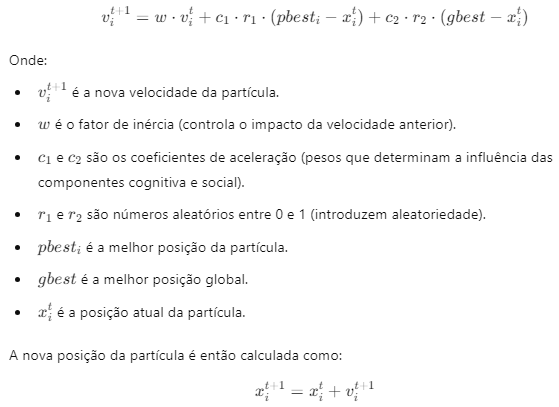

In [8]:
def avaliacao_multistep(janela_real, janela_prevista):
    
    mae_med = 0
    mse_med = 0
    rmse_med = 0
    mape_med = 0
    acuracia_med = 0
    # Converte as listas para arrays NumPy
    #janela_real = np.array(janela_real)
    #janela_prevista = np.array(janela_prevista)
    print(len(janela_real[0]))
    
    for j in range(len(janela_prevista)):
        if len(janela_real) != len(janela_prevista):
            raise ValueError("As janelas reais e previstas devem ter o mesmo comprimento.")

        else:
        #r2 =  round(r2_score(janela_real, janela_prevista), 2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
        #print("R^2 Score of LSTM model = ",r2)
        #print(" ")

            mae = round(mean_absolute_error(janela_real[j], janela_prevista[j]), 3) # Arredondamento com três casas decimais
            print("MAE(Erro absoluto médio) Score of LSTM model = ",mae)
            print(" ")

            mse = round(mean_squared_error(janela_real[j], janela_prevista[j]), 3)
            print("MSE(Erro quadrático médio) Score of LSTM model = ",mse)
            print(" ")
            
            rmse = round(np.sqrt(mse), 3)
            print("RMSE(Raiz do erro quadrático médio) Score of LSTM model = ",rmse)
            print(" ")

            mape = round(mean_absolute_percentage_error(janela_real[j], janela_prevista[j]), 2)
            print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",mape)
            print(" ")
            
            ### Cálculo da ACURÁCIA ###
            
            # Calcula a diferença percentual
            diferencas_percentuais = np.abs((np.array(janela_real[j]) - np.array(janela_prevista[j])) / np.array(janela_real[j]))

            # Conta quantas diferenças percentuais estão dentro da tolerância
            acertos = np.sum(diferencas_percentuais <= 0.05) #0.05 é a tolerância

            # Calcula a acurácia
            acuracia = acertos / len(janela_real[0])   
            acuracia = round(100 * acuracia, 2)
            
            print("Accuracy Score of LSTM model = ",acuracia)
            mae_med += mae
            mse_med += mse
            rmse_med += rmse
            mape_med += mape
            acuracia_med += acuracia
            
    mae_med = mae_med/(len(janela_prevista))
    mse_med /=(len(janela_prevista))
    rmse_med /=(len(janela_prevista))
    mape_med /=(len(janela_prevista))
    acuracia_med /=(len(janela_prevista))
    
    return round(mae_med,2), round(mse_med,2), round(rmse_med,2), round(mape_med,2), round(acuracia_med,2)

In [ ]:
y_pred = model.predict(X_validation)
print(len(X_validation), len(y_pred), len(X_validation[0]))
y_pred_rescaled = scaler.inverse_transform(y_pred)

y_test_rescaled = scaler.inverse_transform(y_validation)
#indices_to_validate = indices_to_validate[:len(y_pred_rescaled)]
indices_to_validate = indices_to_validate[:validation_interval]
print(indices_to_validate)

plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[0:output_steps], y_test_rescaled[0], label="Original", color='blue')
plt.plot(indices_to_validate[0:output_steps], y_pred_rescaled[0], label="Predição", color='red')
plt.yticks(np.arange(0,80000,step=10000))
plt.show()

plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[3:3+output_steps], y_test_rescaled[3], label="Original", color='blue')
plt.plot(indices_to_validate[3:3+output_steps], y_pred_rescaled[3], label="Predição", color='red')
plt.yticks(np.arange(0,80000,step=10000))
plt.show()


plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[6:6+output_steps], y_test_rescaled[6], label="Original", color='blue')
plt.plot(indices_to_validate[6:6+output_steps], y_pred_rescaled[6], label="Predição", color='red')
plt.yticks(np.arange(0,80000,step=10000))
plt.show()


plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[9:9+output_steps], y_test_rescaled[9], label="Original", color='blue')
plt.plot(indices_to_validate[9:9+output_steps], y_pred_rescaled[9], label="Predição", color='red')
plt.yticks(np.arange(0,80000,step=10000))
plt.show()


plt.figure(figsize=(8,6))
plt.plot(indices_to_validate[11:11+output_steps], y_test_rescaled[11], label="Original", color='blue')
plt.plot(indices_to_validate[11:11+output_steps], y_pred_rescaled[11], label="Predição", color='red')
plt.yticks(np.arange(0,80000,step=10000))
plt.show()


In [ ]:
avaliacao_multistep(y_test_rescaled,y_pred_rescaled)